In [1]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn import tree
import array
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [4]:
data.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,usual,critical,foster,3,convenient,convenient,nonprob,recommended,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


In [5]:
xn = data.iloc[:, 0:8]
xn.head()

,parents,has_nurs,form,children,housing,finance,social,health
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended
1,usual,proper,complete,1,convenient,convenient,nonprob,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority


In [6]:
yn = data.iloc[:, -1]
yn.head()

0    recommend
1     priority
2    not_recom
3    recommend
4     priority
Name: class, dtype: object

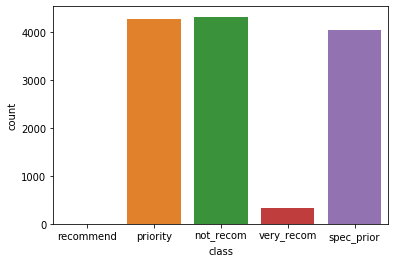

In [7]:
plot_class = sns.countplot(yn)

In [8]:
yn.value_counts()

not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: class, dtype: int64

In [9]:
xn_train, xn_test, yn_train, yn_test = train_test_split(xn, yn, test_size = 0.3)

In [10]:
xn_train.head()

,parents,has_nurs,form,children,housing,finance,social,health
4247,usual,very_crit,foster,3,less_conv,inconv,problematic,not_recom
10652,great_pret,improper,completed,2,convenient,inconv,slightly_prob,not_recom
7665,pretentious,critical,foster,2,critical,inconv,problematic,recommended
6035,pretentious,less_proper,foster,more,critical,convenient,slightly_prob,not_recom
10102,great_pret,less_proper,incomplete,more,convenient,convenient,slightly_prob,priority


In [11]:
pqr = xn_train
pqr['class'] = yn_train

C:\Users\Athashree\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
pqr.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
4247,usual,very_crit,foster,3,less_conv,inconv,problematic,not_recom,not_recom
10652,great_pret,improper,completed,2,convenient,inconv,slightly_prob,not_recom,not_recom
7665,pretentious,critical,foster,2,critical,inconv,problematic,recommended,spec_prior
6035,pretentious,less_proper,foster,more,critical,convenient,slightly_prob,not_recom,not_recom
10102,great_pret,less_proper,incomplete,more,convenient,convenient,slightly_prob,priority,priority


In [13]:
yn_train.value_counts()

not_recom     3006
priority      3000
spec_prior    2832
very_recom     233
recommend        1
Name: class, dtype: int64

In [14]:
datan_1 = pqr[pqr['class']=='very_recom']  
datan_1.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
489,usual,proper,incomplete,2,convenient,convenient,slightly_prob,recommended,very_recom
4347,pretentious,proper,complete,1,less_conv,inconv,nonprob,recommended,very_recom
5625,pretentious,less_proper,incomplete,1,convenient,inconv,nonprob,recommended,very_recom
1728,usual,improper,complete,1,convenient,convenient,nonprob,recommended,very_recom
4374,pretentious,proper,complete,2,convenient,convenient,nonprob,recommended,very_recom


In [15]:
datan_2 = pqr[pqr['class']== 'recommend']
datan_2.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend


In [16]:
datan_n = pqr[pqr['class']== 'priority']
datan_n.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
10102,great_pret,less_proper,incomplete,more,convenient,convenient,slightly_prob,priority,priority
8370,pretentious,very_crit,incomplete,more,convenient,convenient,nonprob,recommended,priority
2890,usual,critical,completed,2,less_conv,inconv,nonprob,priority,priority
5266,pretentious,less_proper,complete,2,less_conv,inconv,nonprob,priority,priority
3261,usual,critical,foster,1,less_conv,convenient,slightly_prob,recommended,priority


In [17]:
datan_n = datan_n.append(datan_1) #appending very_reco
datan_n.tail()

,parents,has_nurs,form,children,housing,finance,social,health,class
4752,pretentious,proper,incomplete,1,convenient,convenient,nonprob,recommended,very_recom
894,usual,less_proper,complete,1,less_conv,inconv,slightly_prob,recommended,very_recom
4545,pretentious,proper,completed,1,convenient,inconv,nonprob,recommended,very_recom
36,usual,proper,complete,1,critical,convenient,nonprob,recommended,very_recom
1764,usual,improper,complete,1,critical,convenient,nonprob,recommended,very_recom


In [18]:
datan_n.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,3233,3233,3233,3233,3233,3233,3233,3233,3233
unique,3,5,4,4,3,2,3,2,2
top,usual,less_proper,complete,1,convenient,convenient,slightly_prob,recommended,priority
freq,1481,1064,894,954,1321,1732,1178,1933,3000


In [19]:
xn1 = datan_n.iloc[:, 0:8]
yn1 = datan_n.iloc[:, -1]

In [20]:
oversampler = RandomOverSampler()
xn1_resampled, yn1_resampled = oversampler.fit_resample(xn1, yn1)

In [21]:
data2n_final = pd.DataFrame(xn1_resampled)
data2n_final.head()

,0,1,2,3,4,5,6,7
0,great_pret,less_proper,incomplete,more,convenient,convenient,slightly_prob,priority
1,pretentious,very_crit,incomplete,more,convenient,convenient,nonprob,recommended
2,usual,critical,completed,2,less_conv,inconv,nonprob,priority
3,pretentious,less_proper,complete,2,less_conv,inconv,nonprob,priority
4,usual,critical,foster,1,less_conv,convenient,slightly_prob,recommended


In [22]:
data2n_final['class']=pd.DataFrame(yn1_resampled)
data2n_final.head()

,0,1,2,3,4,5,6,7,class
0,great_pret,less_proper,incomplete,more,convenient,convenient,slightly_prob,priority,priority
1,pretentious,very_crit,incomplete,more,convenient,convenient,nonprob,recommended,priority
2,usual,critical,completed,2,less_conv,inconv,nonprob,priority,priority
3,pretentious,less_proper,complete,2,less_conv,inconv,nonprob,priority,priority
4,usual,critical,foster,1,less_conv,convenient,slightly_prob,recommended,priority


In [23]:
data2n_final.columns=['parents','has_nurs','form','children','housing','finance','social','health','class']
data2n_final.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,great_pret,less_proper,incomplete,more,convenient,convenient,slightly_prob,priority,priority
1,pretentious,very_crit,incomplete,more,convenient,convenient,nonprob,recommended,priority
2,usual,critical,completed,2,less_conv,inconv,nonprob,priority,priority
3,pretentious,less_proper,complete,2,less_conv,inconv,nonprob,priority,priority
4,usual,critical,foster,1,less_conv,convenient,slightly_prob,recommended,priority


In [24]:
data2n = pqr[pqr['class']== 'not_recom']
data2n.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
4247,usual,very_crit,foster,3,less_conv,inconv,problematic,not_recom,not_recom
10652,great_pret,improper,completed,2,convenient,inconv,slightly_prob,not_recom,not_recom
6035,pretentious,less_proper,foster,more,critical,convenient,slightly_prob,not_recom,not_recom
365,usual,proper,completed,3,critical,convenient,slightly_prob,not_recom,not_recom
5645,pretentious,less_proper,incomplete,1,less_conv,inconv,nonprob,not_recom,not_recom


In [25]:
data2n = data2n.append(datan_2)
data2n.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,3007,3007,3007,3007,3007,3007,3007,3007,3007
unique,3,5,4,4,3,2,3,2,2
top,great_pret,less_proper,incomplete,more,critical,inconv,slightly_prob,not_recom,not_recom
freq,1011,614,768,762,1033,1534,1034,3006,3006


In [26]:
x1n = data2n.iloc[:, 0:8]
x1n.head()

,parents,has_nurs,form,children,housing,finance,social,health
4247,usual,very_crit,foster,3,less_conv,inconv,problematic,not_recom
10652,great_pret,improper,completed,2,convenient,inconv,slightly_prob,not_recom
6035,pretentious,less_proper,foster,more,critical,convenient,slightly_prob,not_recom
365,usual,proper,completed,3,critical,convenient,slightly_prob,not_recom
5645,pretentious,less_proper,incomplete,1,less_conv,inconv,nonprob,not_recom


In [27]:
y1n = data2n.iloc[:,-1]
y1n.head()

4247     not_recom
10652    not_recom
6035     not_recom
365      not_recom
5645     not_recom
Name: class, dtype: object

In [28]:
x1_resampled, y1_resampled = oversampler.fit_resample(x1n, y1n)

In [29]:
data22n = pd.DataFrame(x1_resampled)
data22n.head()

,0,1,2,3,4,5,6,7
0,usual,very_crit,foster,3,less_conv,inconv,problematic,not_recom
1,great_pret,improper,completed,2,convenient,inconv,slightly_prob,not_recom
2,pretentious,less_proper,foster,more,critical,convenient,slightly_prob,not_recom
3,usual,proper,completed,3,critical,convenient,slightly_prob,not_recom
4,pretentious,less_proper,incomplete,1,less_conv,inconv,nonprob,not_recom


In [30]:
data22n['class']=pd.DataFrame(y1_resampled)
data22n.head()

,0,1,2,3,4,5,6,7,class
0,usual,very_crit,foster,3,less_conv,inconv,problematic,not_recom,not_recom
1,great_pret,improper,completed,2,convenient,inconv,slightly_prob,not_recom,not_recom
2,pretentious,less_proper,foster,more,critical,convenient,slightly_prob,not_recom,not_recom
3,usual,proper,completed,3,critical,convenient,slightly_prob,not_recom,not_recom
4,pretentious,less_proper,incomplete,1,less_conv,inconv,nonprob,not_recom,not_recom


In [31]:
data22n.columns=['parents','has_nurs','form','children','housing','finance','social','health','class']
data22n.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,very_crit,foster,3,less_conv,inconv,problematic,not_recom,not_recom
1,great_pret,improper,completed,2,convenient,inconv,slightly_prob,not_recom,not_recom
2,pretentious,less_proper,foster,more,critical,convenient,slightly_prob,not_recom,not_recom
3,usual,proper,completed,3,critical,convenient,slightly_prob,not_recom,not_recom
4,pretentious,less_proper,incomplete,1,less_conv,inconv,nonprob,not_recom,not_recom


In [32]:
data2n_final = data2n_final.append(data22n)

In [33]:
data2n_final = data2n_final. append(pqr[pqr['class']== 'spec_prior'])

In [34]:
data2n_final.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,14844,14844,14844,14844,14844,14844,14844,14844,14844
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
freq,7683,5815,6182,6548,7888,9350,7334,8813,3006


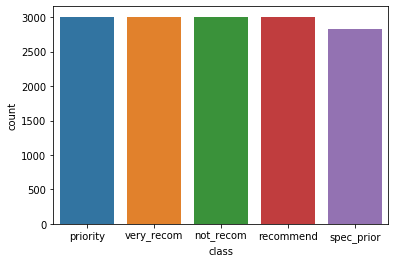

In [35]:
plot_class = sns.countplot(x="class", data= data2n_final)

In [36]:
xn_train = data2n_final.iloc[:,0:8]
xn_train.head()

,parents,has_nurs,form,children,housing,finance,social,health
0,great_pret,less_proper,incomplete,more,convenient,convenient,slightly_prob,priority
1,pretentious,very_crit,incomplete,more,convenient,convenient,nonprob,recommended
2,usual,critical,completed,2,less_conv,inconv,nonprob,priority
3,pretentious,less_proper,complete,2,less_conv,inconv,nonprob,priority
4,usual,critical,foster,1,less_conv,convenient,slightly_prob,recommended


In [37]:
xn_train = pd.get_dummies(xn_train)

In [38]:
xn_train.head()

,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_complete,form_completed,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
0,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,0,1,1,0,0,0,0,0,1,...,0,1,0,1,1,0,0,0,1,0
3,0,1,0,0,0,1,0,0,1,0,...,0,1,0,1,1,0,0,0,1,0
4,0,0,1,1,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,1


In [39]:
yn_train = data2n_final.iloc[:,-1]
yn_train.head()

0    priority
1    priority
2    priority
3    priority
4    priority
Name: class, dtype: object

In [40]:
yn_train = pd.DataFrame(yn_train)
yn_train.head()

,class
0,priority
1,priority
2,priority
3,priority
4,priority


In [41]:
rep_val = {'priority':1,'spec_prior':2,'not_recom':3,'very_recom':4,'recommend':5}
yn_train['class'] = [rep_val[i] for i in yn_train['class']]

In [42]:
yn_train.head()

,class
0,1
1,1
2,1
3,1
4,1


In [43]:
xn_test = pd.get_dummies(xn_test)
xn_test.head()

,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_complete,form_completed,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
664,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4188,0,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
8174,0,1,0,0,0,0,0,1,0,1,...,0,1,1,0,1,0,0,1,0,0
7569,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
8976,1,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1


In [44]:
yn_test

664        priority
4188     spec_prior
8174      not_recom
7569     spec_prior
8976       priority
            ...    
9428      not_recom
11424    spec_prior
1929       priority
12539     not_recom
12941     not_recom
Name: class, Length: 3888, dtype: object

In [45]:
yn_test = pd.DataFrame(yn_test)
yn_test

,class
664,priority
4188,spec_prior
8174,not_recom
7569,spec_prior
8976,priority
...,...
9428,not_recom
11424,spec_prior
1929,priority
12539,not_recom


In [46]:
rep_val = {'priority':1,'spec_prior':2,'not_recom':3,'very_recom':4,'recommend':5}
yn_test['class'] = [rep_val[i] for i in yn_test['class']]

In [47]:
yn_test.head()

,class
664,1
4188,2
8174,3
7569,2
8976,1


# Base Classifier

In [48]:
dt2n_training = np.tile(0., 27)
dt2n_testing = np.tile(0., 27)
print("depth | Training score    | Testing score")
for i in range (1,27):
    print(i,end="   |   ")
    dt2 = tree.DecisionTreeClassifier(max_depth=i,criterion = 'entropy')
    dt2.fit(xn_train, yn_train)
    score1 = dt2.score(xn_train,yn_train)
    dt2n_training[i] = score1.mean()
    print(round(dt2n_training[i],5), end = "         |  ")
    #dt2.fit(xnf_test, ynf_test)
    score2 = dt2.score(xn_test,yn_test)
    dt2n_testing[i] = score2.mean()
    print(round(dt2n_testing[i],5))
    

depth | Training score    | Testing score
1   |   0.40501         |  0.33822
2   |   0.58414         |  0.62963
3   |   0.68735         |  0.53421
4   |   0.77358         |  0.63992
5   |   0.84209         |  0.74588
6   |   0.8941         |  0.82742
7   |   0.92495         |  0.866
8   |   0.94213         |  0.91332
9   |   0.95675         |  0.91487
10   |   0.9707         |  0.93621
11   |   0.98356         |  0.96348
12   |   0.99326         |  0.97814
13   |   0.99859         |  0.98868
14   |   0.99933         |  0.99151
15   |   0.99987         |  0.99203
16   |   1.0         |  0.99408
17   |   1.0         |  0.99357
18   |   1.0         |  0.99357
19   |   1.0         |  0.99331
20   |   1.0         |  0.99408
21   |   1.0         |  0.9928
22   |   1.0         |  0.99331
23   |   1.0         |  0.99228
24   |   1.0         |  0.99408
25   |   1.0         |  0.99228
26   |   1.0         |  0.9928


In [49]:
dt2n_training=dt2n_training[dt2n_training!=0.]
dt2n_testing=dt2n_testing[dt2n_testing!=0.]
xaxis2 = array.array('i',(i for i in range(1,27)))

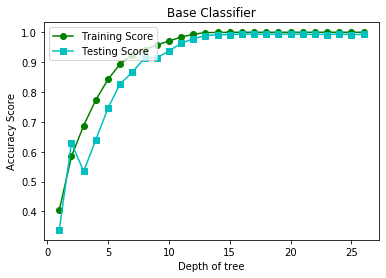

In [50]:
fig5, p5 = plt.subplots()
plt.plot(xaxis2, dt2n_training,'go-', Label='Training Score')
plt.plot(xaxis2, dt2n_testing,'cs-', Label = 'Testing Score')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('Base Classifier')
legend = p5.legend(loc='upper left')

Oversampling hasn't caused the model to overfit in this case. 

The model isn't overfitting thus even if bagging is applied there wont be much difference in performance. 

# Bagging

In [51]:
#Bagging
train = np.tile(0., 27)
test = np.tile(0., 27)
print("depth | Training score    | Testing score")
for i in range(1,27):
    print(i,end="   |   ")
    model = BaggingClassifier(tree.DecisionTreeClassifier(max_depth=i,criterion = 'entropy'))
    model.fit(xn_train, yn_train.values.ravel())
    score1 = model.score(xn_train,yn_train)
    train[i] = score1.mean()
    print(round(train[i],5), end = "         |  ")
    score2 = model.score(xn_test,yn_test)
    test[i] = score2.mean()
    print(round(test[i],5))

depth | Training score    | Testing score
1   |   0.40501         |  0.33822
2   |   0.58414         |  0.62963
3   |   0.69301         |  0.59259
4   |   0.7694         |  0.63837
5   |   0.84984         |  0.76029
6   |   0.89814         |  0.83462
7   |   0.9325         |  0.88117
8   |   0.95352         |  0.92258
9   |   0.96672         |  0.93904
10   |   0.98356         |  0.95602
11   |   0.98996         |  0.97351
12   |   0.99731         |  0.98637
13   |   0.9996         |  0.99048
14   |   0.99987         |  0.99048
15   |   0.99987         |  0.99357
16   |   0.9998         |  0.99151
17   |   0.99966         |  0.9928
18   |   0.99987         |  0.99074
19   |   0.9998         |  0.99254
20   |   0.99966         |  0.991
21   |   0.99973         |  0.99074
22   |   0.99987         |  0.99177
23   |   0.99993         |  0.99228
24   |   0.99993         |  0.98945
25   |   0.99993         |  0.99254
26   |   0.99993         |  0.99023


In [52]:
train=train[train!=0.]
test=test[test!=0.]
xaxis2 = array.array('i',(i for i in range(1,27)))
xaxis2

array('i', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

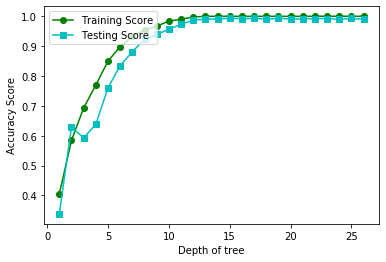

In [53]:
fig2, aa2 = plt.subplots()
plt.plot(xaxis2, train,'go-', Label='Training Score')
plt.plot(xaxis2, test,'cs-', Label = 'Testing Score')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
legend = aa2.legend(loc='upper left')

In [54]:
comp_ros = ([0.33847737, 0.33873457, 0.61599794, 0.65817901, 0.77057613,
       0.84053498, 0.89403292, 0.90817901, 0.93132716, 0.94881687,
       0.968107  , 0.98302469, 0.99074074, 0.99356996, 0.99331276,
       0.99279835, 0.99356996, 0.99279835, 0.99279835, 0.99331276,
       0.99331276, 0.99254115, 0.99279835, 0.99408436, 0.99305556,
       0.99279835])

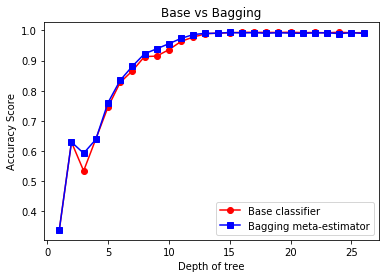

In [55]:
fig1, aa1 = plt.subplots()
plt.plot(xaxis2, dt2n_testing,'ro-', Label='Base classifier')
plt.plot(xaxis2, test,'bs-', Label = 'Bagging meta-estimator')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('Base vs Bagging')
legend = aa1.legend(loc='lower right')

# Random Forest Classifier

In [56]:
train_rf = np.tile(0., 27)
test_rf = np.tile(0., 27)
print("depth | Training score    | Testing score")
for i in range(1,27):
    print(i,end="   |   ")
    model_rf = RandomForestClassifier(max_depth=i, criterion = 'entropy',n_estimators=100)
    model_rf.fit(xn_train, yn_train.values.ravel())
    score1 = model_rf.score(xn_train,yn_train)
    train_rf[i] = score1.mean()
    print(round(train_rf[i],5), end = "         |  ")
    score2 = model_rf.score(xn_test,yn_test)
    test_rf[i] = score2.mean()
    print(round(test_rf[i],5))

depth | Training score    | Testing score
1   |   0.65225         |  0.58848
2   |   0.74151         |  0.66924
3   |   0.83892         |  0.76029
4   |   0.87018         |  0.80273
5   |   0.90501         |  0.85159
6   |   0.93378         |  0.8948
7   |   0.95722         |  0.92464
8   |   0.96995         |  0.93904
9   |   0.98215         |  0.95808
10   |   0.99151         |  0.97171
11   |   0.99704         |  0.97891
12   |   0.99832         |  0.982
13   |   0.99993         |  0.98765
14   |   1.0         |  0.98843
15   |   1.0         |  0.9928
16   |   1.0         |  0.991
17   |   1.0         |  0.98894
18   |   1.0         |  0.98817
19   |   1.0         |  0.99023
20   |   1.0         |  0.99151
21   |   1.0         |  0.99023
22   |   1.0         |  0.98894
23   |   1.0         |  0.98868
24   |   1.0         |  0.98997
25   |   1.0         |  0.9892
26   |   1.0         |  0.99126


In [57]:
train_rf=train_rf[train_rf!=0.]
test_rf=test_rf[test_rf!=0.]
xaxis2 = array.array('i',(i for i in range(1,27)))
xaxis2

array('i', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

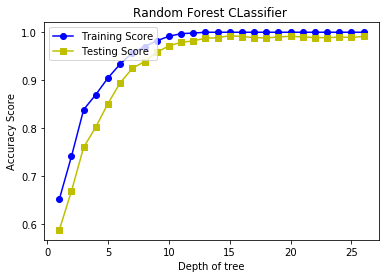

In [58]:
fig3, b3 = plt.subplots()
plt.plot(xaxis2, train_rf,'bo-', Label='Training Score')
plt.plot(xaxis2, test_rf,'ys-', Label = 'Testing Score')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('Random Forest CLassifier ')
legend = b3.legend(loc='upper left')

# Comparision of Base - Bagging- Random Forest

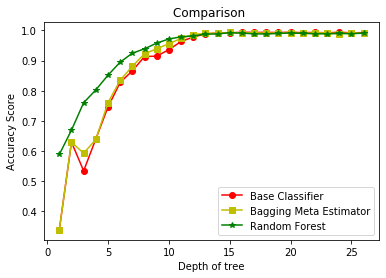

In [59]:
fig4, b4 = plt.subplots()
plt.plot(xaxis2,  dt2n_testing,'ro-', Label='Base Classifier')
plt.plot(xaxis2, test,'ys-', Label = 'Bagging Meta Estimator')
plt.plot(xaxis2, test_rf,'g*-', Label = 'Random Forest')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('Comparison ')
legend = b4.legend(loc='lower right')

As expected, except for the depth~2, base classifier (Decision Tree) is performing similiar to that of bagging techniques

# XGBoost

In [60]:
train_xgb_md = np.tile(0., 30)
test_xgb_md = np.tile(0., 30)
print("depth | Training score    | Testing score")
for i in range (1,27):
    print(i,end="   |   ")
    clf_xgb_md = xgb.XGBClassifier(n_estimators=100,max_depth=i)
    clf_xgb_md.fit(xn_train, yn_train.values.ravel())
    score1 = clf_xgb_md.score(xn_train, yn_train)
    train_xgb_md[i] = score1.mean()
    print(round(train_xgb_md[i],4), end = "         |  ")
    score2 = clf_xgb_md.score(xn_test,yn_test)
    test_xgb_md[i] = score2.mean()
    print(round(test_xgb_md[i],4))


depth | Training score    | Testing score
1   |   0.9264         |  0.8817
2   |   0.9782         |  0.9627
3   |   0.9984         |  0.9943
4   |   0.9999         |  0.9982
5   |   1.0         |  0.9982
6   |   1.0         |  0.9982
7   |   1.0         |  0.9982
8   |   1.0         |  0.9977
9   |   1.0         |  0.9982
10   |   1.0         |  0.9979
11   |   1.0         |  0.9977
12   |   1.0         |  0.9977
13   |   1.0         |  0.9977
14   |   1.0         |  0.9979
15   |   1.0         |  0.9979
16   |   1.0         |  0.9979
17   |   1.0         |  0.9979
18   |   1.0         |  0.9979
19   |   1.0         |  0.9979
20   |   1.0         |  0.9979
21   |   1.0         |  0.9979
22   |   1.0         |  0.9979
23   |   1.0         |  0.9979
24   |   1.0         |  0.9979
25   |   1.0         |  0.9979
26   |   1.0         |  0.9979


In [61]:
train_xgb_md=train_xgb_md[train_xgb_md!=0.]
test_xgb_md=test_xgb_md[test_xgb_md!=0.]
xaxis = array.array('i',(i for i in range(1,27)))

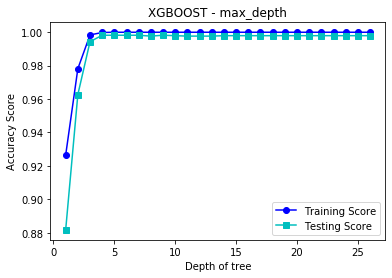

In [62]:
fig4, a4 = plt.subplots()
plt.plot(xaxis, train_xgb_md,'bo-', Label='Training Score')
plt.plot(xaxis, test_xgb_md,'cs-', Label = 'Testing Score')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('XGBOOST - max_depth')
legend = a4.legend(loc='lower right')

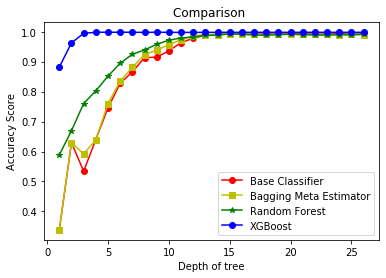

In [63]:
fig5, b5 = plt.subplots()
plt.plot(xaxis2,  dt2n_testing,'ro-', Label='Base Classifier')
plt.plot(xaxis2, test,'ys-', Label = 'Bagging Meta Estimator')
plt.plot(xaxis2, test_rf,'g*-', Label = 'Random Forest')
plt.plot(xaxis2, test_xgb_md,'bo-', Label = 'XGBoost')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('Comparison ')
legend = b5.legend(loc='lower right')

Boosting is used when we already have strong base classifier. In this case, decision tree was already a strong classifiers. Although, all the classifiers have similar performances athigher levels of depth, XGBooost performed significantly better in comparison with the other models even at lower depth levels. 